In [1]:
# Import modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from bgreference import refseq 
import collections
from collections import Counter
from itertools import islice

import matplotlib.patches as patches
from matplotlib.patches import Rectangle

# split into even chunks
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]


In [2]:
import numpy as np

def get_mut(x):    
    try:
        triplet = '{}_{}'.format(refseq('sarscov2', '0', x['POS']-1, 3).replace('\n', 'N'), x['ALT'])
        #triplet = '{}{}{}_{}'.format(refseq('sarscov2', '0', x['POS']-1, 1).replace('\n', 'N'), x['REF'], refseq('sarscov2', '0', x['POS']+1, 1).replace('\n', 'N'), x['ALT'])
    except:
        triplet = 'NNN'
    return triplet

def order_muts_full():    
    order = []
    first = ['A', 'C', 'G', 'T']
    pyr = ['C', 'T']
    for p in pyr:
        for mut in first:
            if mut != p:
                for f in first:
                    for f2 in first:
                        comb = '{}{}{}_{}'.format(f, p, f2, mut)
                        order.append(comb)
    first = ['T', 'G', 'C', 'A']
    pyr = ['G', 'A']
    for p in pyr:
        for mut in first:
            if mut != p:
                for f in first:
                    for f2 in first:
                        comb = '{}{}{}_{}'.format(f, p, f2, mut)
                        order.append(comb)    
    return order

def slicing_window(seq, n=3):
    """
    Fast slicing window
    :param seq:
    :param n:
    :return:
    """    
    
    it = iter(seq)
    result = ''.join(islice(it, n))    
    
    if len(result) == n:
        yield result    
        
    for elem in it:
        result = result[1:] + elem
        #print(result)
        yield result
        
l = refseq('sarscov2', '0', 1, 100000000).rstrip()
count_genome_compo = Counter(list(slicing_window(l)))
print(count_genome_compo)

Counter({'TTT': 1004, 'AAA': 923, 'TTA': 876, 'TGT': 858, 'TTG': 817, 'ACA': 809, 'ATT': 773, 'AAT': 761, 'CTT': 738, 'ATG': 725, 'TAA': 719, 'CAA': 703, 'GTT': 700, 'ACT': 674, 'TGA': 630, 'TAT': 622, 'AAC': 615, 'TAC': 609, 'AGA': 605, 'AAG': 580, 'CTA': 561, 'TGG': 554, 'GTG': 552, 'TCA': 549, 'TGC': 547, 'TCT': 542, 'GAA': 535, 'GCT': 521, 'TTC': 518, 'AGT': 507, 'CTG': 495, 'CAT': 484, 'ATA': 471, 'GTA': 469, 'CAC': 459, 'GGT': 454, 'GAT': 440, 'CAG': 438, 'TAG': 427, 'ACC': 376, 'GCA': 372, 'CCA': 354, 'CCT': 344, 'GAC': 340, 'ATC': 339, 'AGG': 329, 'AGC': 301, 'GAG': 297, 'CTC': 287, 'GGA': 282, 'GTC': 269, 'GGC': 223, 'TCC': 209, 'GCC': 187, 'CGT': 171, 'ACG': 164, 'GGG': 134, 'CCC': 116, 'TCG': 113, 'CGC': 97, 'CGA': 95, 'GCG': 88, 'CGG': 76, 'CCG': 74})


In [3]:
%qtconsole 

In [4]:
#austria github
dfaus = pd.read_csv('data/inter/SARS-CoV-2-project_OnlyAustrian.csv', sep ='\t')

#austria github +8000
dfgisaus = pd.read_csv('data/inter/SARS-CoV-2-project.csv', sep ='\t')

#nanopore
dfnano = pd.read_csv('data/nanopore/ncov_nanopore_list_ex.csv', sep ='\t')

#illumina
dfillu = pd.read_csv('data/illumina/ncov_illumina_list_ex.csv', sep ='\t')

#take syn/non-syn
dfaus_nonsyn=dfaus[dfaus["csqn_type"].isin(["stop_gained","missense_variant","start_lost"])]
dfaus_syn=dfaus[dfaus["csqn_type"].isin(["synonymous_variant","upstream_gene_variant","downstream_gene_variant"])]
dfgisaus_nonsyn=dfgisaus[dfgisaus["csqn_type"].isin(["stop_gained","missense_variant","start_lost"])]
dfgisaus_syn=dfgisaus[dfgisaus["csqn_type"].isin(["synonymous_variant","upstream_gene_variant","downstream_gene_variant"])]
dfnano_syn=dfnano[dfnano["csqn_type"].isin(["synonymous_variant","upstream_gene_variant","downstream_gene_variant"])]
dfillu_syn=dfillu[dfillu["csqn_type"].isin(["synonymous_variant","upstream_gene_variant","downstream_gene_variant"])]

#Figure 1a: Austrian - all mutations.
dfaus['POS'] = dfaus['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfaus['REF'] = dfaus['mutation'].apply(lambda x : x[0])
dfaus['ALT'] = dfaus['mutation'].apply(lambda x : x[-1])
dfaus = dfaus[['POS', 'REF', 'ALT']]
letters = ['A', 'T', 'C', 'G']
#Take only single mutations (although no indels should be present in these files)
dfaus_unique_muts = dfaus[(dfaus['REF'].isin(letters))&(dfaus['ALT'].isin(letters))]
print("Mutations austria: " + str(len(dfaus_unique_muts)))

#Figure 1b: Austrian non-protein affecting.
dfaus_syn['POS'] = dfaus_syn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfaus_syn['REF'] = dfaus_syn['mutation'].apply(lambda x : x[0])
dfaus_syn['ALT'] = dfaus_syn['mutation'].apply(lambda x : x[-1])
dfaus_syn = dfaus_syn[['POS', 'REF', 'ALT']]
dfaus_syn_unique_muts = dfaus_syn[(dfaus_syn['REF'].isin(letters))&(dfaus_syn['ALT'].isin(letters))]
print("Syn mutations austria: " + str(len(dfaus_syn_unique_muts)))

#Figure 1c: Austrian  protein affecting.
dfaus_nonsyn['POS'] = dfaus_nonsyn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfaus_nonsyn['REF'] = dfaus_nonsyn['mutation'].apply(lambda x : x[0])
dfaus_nonsyn['ALT'] = dfaus_nonsyn['mutation'].apply(lambda x : x[-1])
dfaus_nonsyn = dfaus_nonsyn[['POS', 'REF', 'ALT']]
dfaus_nonsyn_unique_muts = dfaus_nonsyn[(dfaus_nonsyn['REF'].isin(letters))&(dfaus_nonsyn['ALT'].isin(letters))]
print("Non Syn mutations austria: " + str(len(dfaus_nonsyn_unique_muts)))

#Figure 2a: GISAID - all mutations.
dfgisaus['POS'] = dfgisaus['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfgisaus['REF'] = dfgisaus['mutation'].apply(lambda x : x[0])
dfgisaus['ALT'] = dfgisaus['mutation'].apply(lambda x : x[-1])
dfgisaus = dfgisaus[['POS', 'REF', 'ALT']]
dfgisaus_unique_muts = dfgisaus[(dfgisaus['REF'].isin(letters))&(dfgisaus['ALT'].isin(letters))]
print("Mutations GISAID + austria: " + str(len(dfgisaus_unique_muts)))

#Figure 2b: GISAID non-protein affecting.
dfgisaus_syn['POS'] = dfgisaus_syn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfgisaus_syn['REF'] = dfgisaus_syn['mutation'].apply(lambda x : x[0])
dfgisaus_syn['ALT'] = dfgisaus_syn['mutation'].apply(lambda x : x[-1])
dfgisaus_syn = dfgisaus_syn[['POS', 'REF', 'ALT']]
dfgisaus_syn_unique_muts = dfgisaus_syn[(dfgisaus_syn['REF'].isin(letters))&(dfgisaus_syn['ALT'].isin(letters))]
print("Syn mutations GISAID + austria: " + str(len(dfgisaus_syn_unique_muts)))

#Figure 2c: GISAID  protein affecting.
dfgisaus_nonsyn['POS'] = dfgisaus_nonsyn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfgisaus_nonsyn['REF'] = dfgisaus_nonsyn['mutation'].apply(lambda x : x[0])
dfgisaus_nonsyn['ALT'] = dfgisaus_nonsyn['mutation'].apply(lambda x : x[-1])
dfgisaus_nonsyn = dfgisaus_nonsyn[['POS', 'REF', 'ALT']]
dfgisaus_nonsyn_unique_muts = dfgisaus_nonsyn[(dfgisaus_nonsyn['REF'].isin(letters))&(dfgisaus_nonsyn['ALT'].isin(letters))]
print("NON Syn mutations GISAID + austria: " + str(len(dfgisaus_nonsyn_unique_muts)))

#Figure 3a: Nanopore - all mutations.
dfnano['POS'] = dfnano['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfnano['REF'] = dfnano['mutation'].apply(lambda x : x[0])
dfnano['ALT'] = dfnano['mutation'].apply(lambda x : x[-1])
dfnano = dfnano[['POS', 'REF', 'ALT']]
dfnano_unique_muts = dfnano[(dfnano['REF'].isin(letters))&(dfnano['ALT'].isin(letters))]
print("Mutations nanopore: " + str(len(dfnano_unique_muts)))

#Figure 3b: Nanopore -  non-protein affecting.
dfnano_syn['POS'] = dfnano_syn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfnano_syn['REF'] = dfnano_syn['mutation'].apply(lambda x : x[0])
dfnano_syn['ALT'] = dfnano_syn['mutation'].apply(lambda x : x[-1])
dfnano_syn = dfnano_syn[['POS', 'REF', 'ALT']]
dfnano_syn_unique_muts = dfnano_syn[(dfnano_syn['REF'].isin(letters))&(dfnano_syn['ALT'].isin(letters))]
print("Syn mutations nanopore: " + str(len(dfnano_syn_unique_muts)))

#Figure 3c: Illumina - all mutations.
dfillu['POS'] = dfillu['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfillu['REF'] = dfillu['mutation'].apply(lambda x : x[0])
dfillu['ALT'] = dfillu['mutation'].apply(lambda x : x[-1])
dfillu = dfillu[['POS', 'REF', 'ALT']]
dfillu_unique_muts = dfillu[(dfillu['REF'].isin(letters))&(dfillu['ALT'].isin(letters))]
print("Mutations illumina: " + str(len(dfillu_unique_muts)))

#Figure 3d: Illumina - non-protein affecting.
dfillu_syn['POS'] = dfillu_syn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfillu_syn['REF'] = dfillu_syn['mutation'].apply(lambda x : x[0])
dfillu_syn['ALT'] = dfillu_syn['mutation'].apply(lambda x : x[-1])
dfillu_syn = dfillu_syn[['POS', 'REF', 'ALT']]
dfillu_syn_unique_muts = dfillu_syn[(dfillu_syn['REF'].isin(letters))&(dfillu_syn['ALT'].isin(letters))]
print("Syn mutations Illumina: " + str(len(dfillu_syn_unique_muts)))

Mutations austria: 273
Syn mutations austria: 107
Non Syn mutations austria: 166
Mutations GISAID + austria: 7950
Syn mutations GISAID + austria: 3314
NON Syn mutations GISAID + austria: 4594
Mutations nanopore: 2655
Syn mutations nanopore: 1048
Mutations illumina: 4874
Syn mutations Illumina: 1885


/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


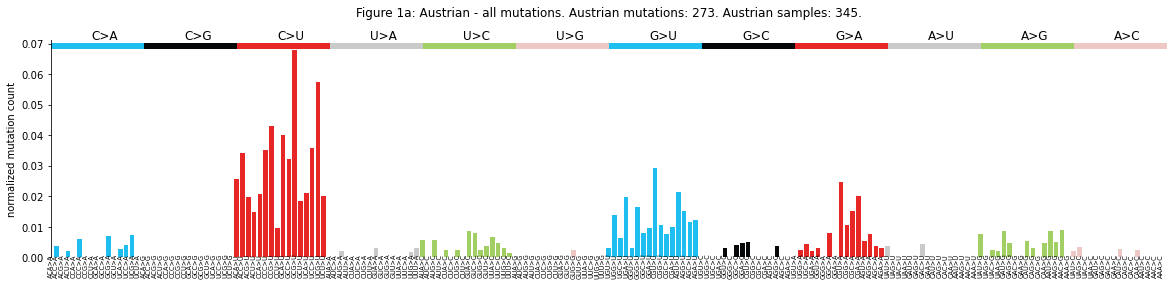

In [18]:
#Figure 1a: Austrian - all mutations.
dfaus_unique_muts['FULL_MUT'] = dfaus_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfaus_unique_muts['FULL_MUT'].value_counts().to_dict()
list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 1a: Austrian - all mutations. Austrian mutations: " + str(len(dfaus_unique_muts['FULL_MUT']))+". Austrian samples: 345.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/austriaAll.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


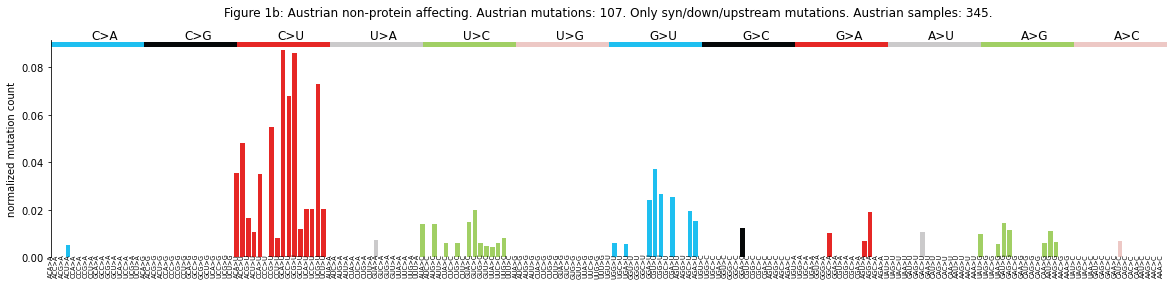

In [19]:
#Figure 1b: Austrian non-protein affecting.
dfaus_syn_unique_muts['FULL_MUT'] = dfaus_syn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfaus_syn_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 1b: Austrian non-protein affecting. Austrian mutations: " + str(len(dfaus_syn_unique_muts['FULL_MUT']))+ ". Only syn/down/upstream mutations. Austrian samples: 345.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/austriaSyn.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


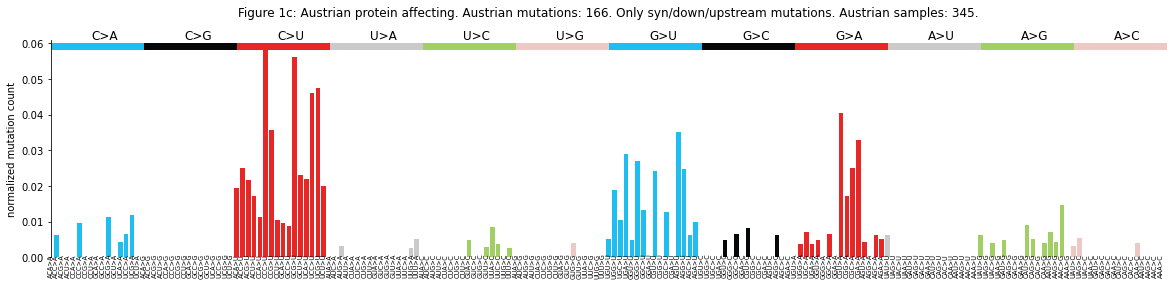

In [20]:
#Figure 1c: Austrian protein affecting.
dfaus_nonsyn_unique_muts['FULL_MUT'] = dfaus_nonsyn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfaus_nonsyn_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 1c: Austrian protein affecting. Austrian mutations: " + str(len(dfaus_nonsyn_unique_muts['FULL_MUT']))+ ". Only syn/down/upstream mutations. Austrian samples: 345.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/austriaNONSyn.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


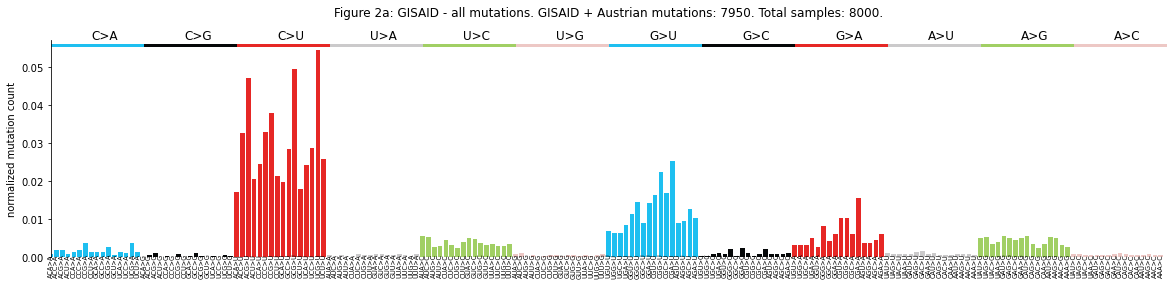

In [21]:
#Figure 2a: GISAID - all mutations.
dfgisaus_unique_muts['FULL_MUT'] = dfgisaus_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfgisaus_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 2a: GISAID - all mutations. GISAID + Austrian mutations: " + str(len(dfgisaus_unique_muts['FULL_MUT']))+". Total samples: 8000.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.001,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/gisaidAustriaAll.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


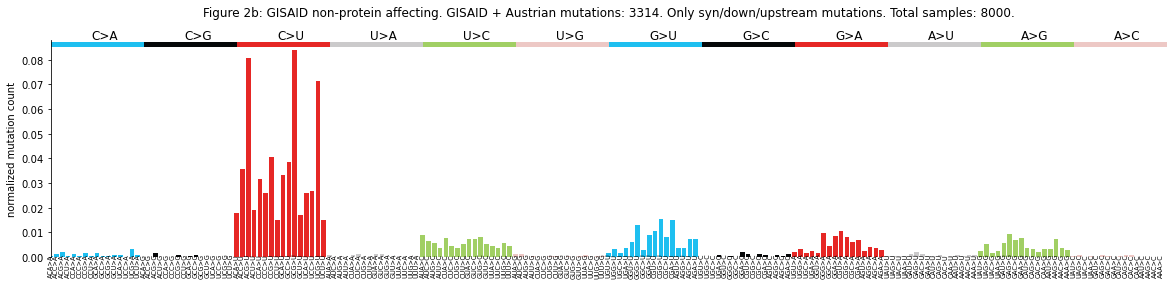

In [22]:
#Figure 2b: GISAID non-protein affecting.
dfgisaus_syn_unique_muts['FULL_MUT'] = dfgisaus_syn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfgisaus_syn_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 2b: GISAID non-protein affecting. GISAID + Austrian mutations: " + str(len(dfgisaus_syn_unique_muts['FULL_MUT']))+ ". Only syn/down/upstream mutations. Total samples: 8000.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/gisaidAustriaSyn.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


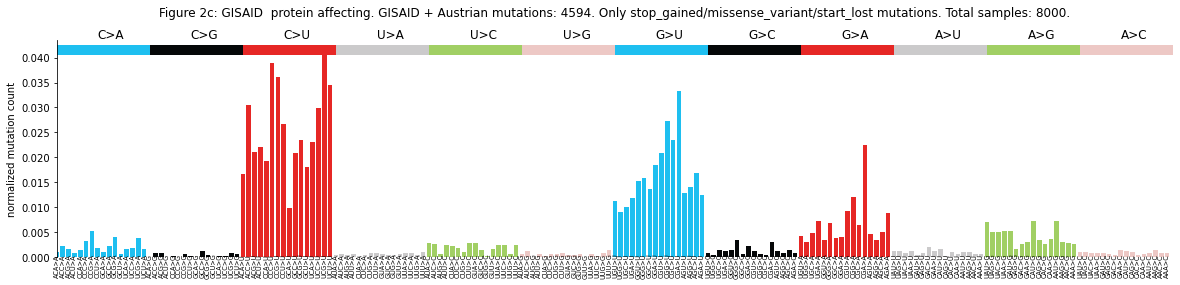

In [23]:
#Figure 2c: GISAID  protein affecting.
dfgisaus_nonsyn_unique_muts['FULL_MUT'] = dfgisaus_nonsyn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfgisaus_nonsyn_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 2c: GISAID  protein affecting. GISAID + Austrian mutations: " + str(len(dfgisaus_nonsyn_unique_muts['FULL_MUT']))+ ". Only stop_gained/missense_variant/start_lost mutations. Total samples: 8000.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/gisaidAustriaNONSyn.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


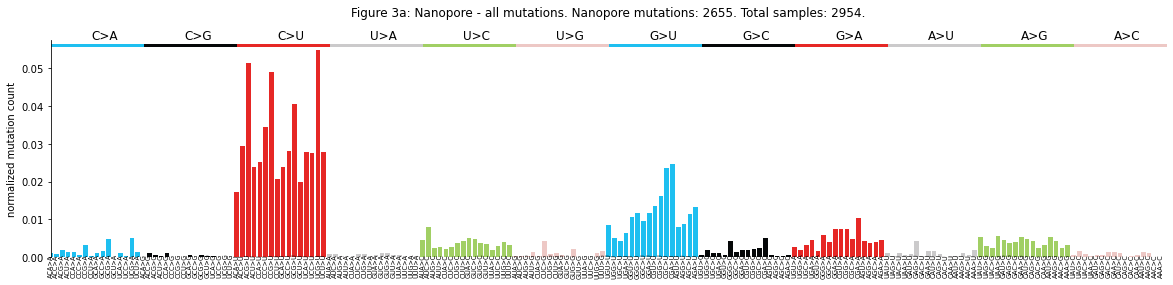

In [24]:
#Figure 3a: Nanopore - all mutations.
dfnano_unique_muts['FULL_MUT'] = dfnano_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order_nano = dfnano_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order_nano.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 3a: Nanopore - all mutations. Nanopore mutations: " + str(len(dfnano_unique_muts['FULL_MUT']))+". Total samples: 2954.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.001,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/nanoporeAll.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


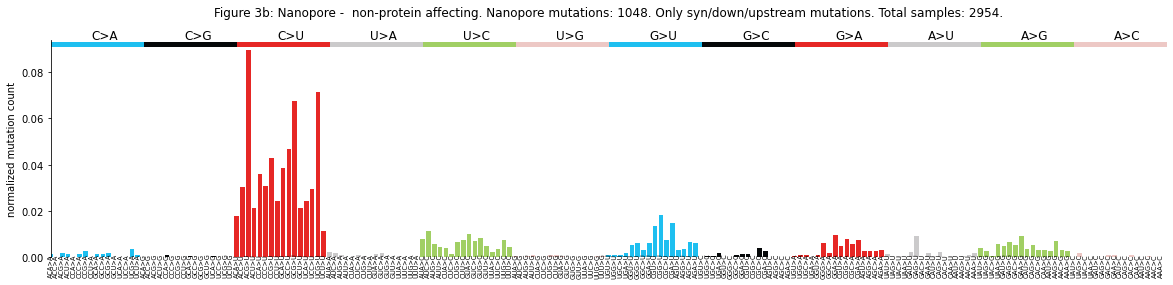

In [25]:
#Figure 3b: Nanopore - non-protein affecting.
dfnano_syn_unique_muts['FULL_MUT'] = dfnano_syn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfnano_syn_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 3b: Nanopore -  non-protein affecting. Nanopore mutations: " + str(len(dfnano_syn_unique_muts['FULL_MUT']))+ ". Only syn/down/upstream mutations. Total samples: 2954.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/nanoporeSyn.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


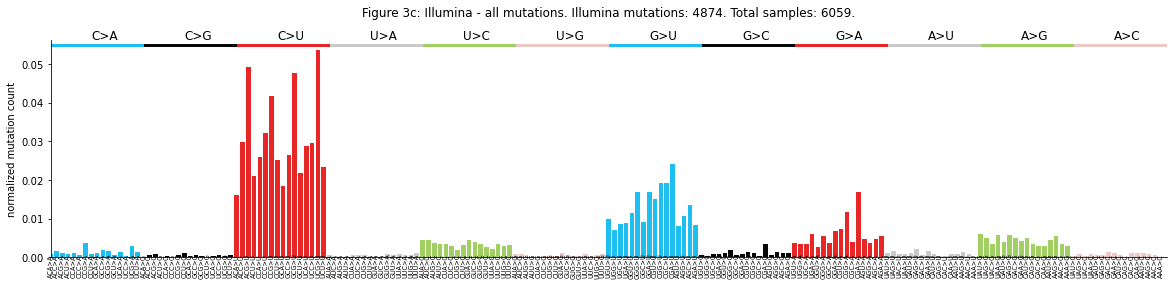

In [26]:
#Figure 3c: Illumina - all mutations.
dfillu_unique_muts['FULL_MUT'] = dfillu_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order_illu = dfillu_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order_illu.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 3c: Illumina - all mutations. Illumina mutations: " + str(len(dfillu_unique_muts['FULL_MUT']))+". Total samples: 6059.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.001,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/illuminaAll.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


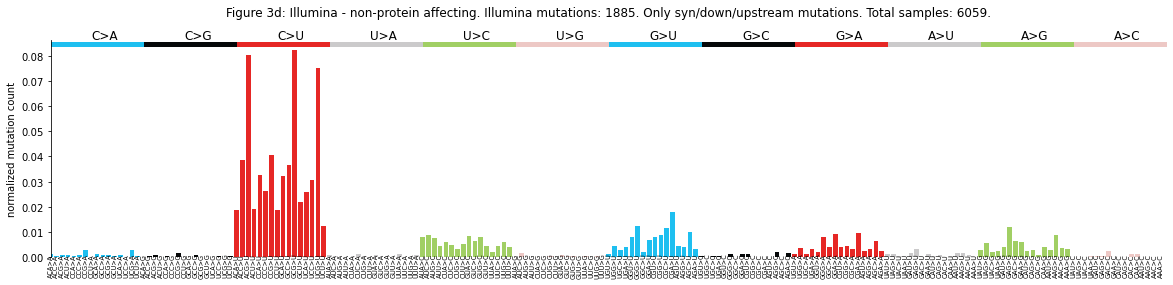

In [27]:
#Figure 3d: Illumina - non-protein affecting.
dfillu_syn_unique_muts['FULL_MUT'] = dfillu_syn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfillu_syn_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)
    
ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 3d: Illumina - non-protein affecting. Illumina mutations: " + str(len(dfillu_syn_unique_muts['FULL_MUT']))+ ". Only syn/down/upstream mutations. Total samples: 6059.", y=1.08)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/illuminaSyn.png")
plt.show()

In [28]:
# split into even chunks
def chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

with open ("data/ref/NC_019843.3_mersRef.ref",'r') as f:
    for line in f:
        mersref=line
        
def refseq(first, last):
    return mersref[first:last]

def get_mut(x): 
    try:
        triplet = '{}{}{}_{}'.format(mersref[x['POS']-2].replace('\n', 'N'), x['REF'], mersref[x['POS']+1].replace('\n', 'N'), x['ALT'])
    except:
        triplet = 'NNN'
    return triplet

def order_muts_full():    
    order = []
    first = ['A', 'C', 'G', 'T']
    pyr = ['C', 'T']
    for p in pyr:
        for mut in first:
            if mut != p:
                for f in first:
                    for f2 in first:
                        comb = '{}{}{}_{}'.format(f, p, f2, mut)
                        order.append(comb)
    first = ['T', 'G', 'C', 'A']
    pyr = ['G', 'A']
    for p in pyr:
        for mut in first:
            if mut != p:
                for f in first:
                    for f2 in first:
                        comb = '{}{}{}_{}'.format(f, p, f2, mut)
                        order.append(comb)    
    return order

def slicing_window(seq, n=3):
    """
    Fast slicing window
    :param seq:
    :param n:
    :return:
    """    
    
    it = iter(seq)
    result = ''.join(islice(it, n))    
    
    if len(result) == n:
        yield result    
        
    for elem in it:
        result = result[1:] + elem
        #print(result)
        yield result
        
l = refseq(1, 100000000).rstrip()
count_genome_compo = Counter(list(slicing_window(l)))

#MERS
dfmers = pd.read_csv('data/mers/mers_tree.list_spec.csv', sep ='\t')
dfmers_syn = pd.read_csv('data/mers/mers_tree.list_ex.csv', sep ='\t')

#take syn
dfmers_syn=dfmers_syn[dfmers_syn["csqn_type"].isin(["synonymous_variant","upstream_gene_variant","downstream_gene_variant"])]
letters = ['A', 'T', 'C', 'G']
#1. MERS
dfmers['POS'] = dfmers['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfmers['REF'] = dfmers['mutation'].apply(lambda x : x[0])
dfmers['ALT'] = dfmers['mutation'].apply(lambda x : x[-1])
dfmers = dfmers[['POS', 'REF', 'ALT']]
dfmers_unique_muts = dfmers[(dfmers['REF'].isin(letters))&(dfmers['ALT'].isin(letters))]

#2. MERS SYN
dfmers_syn['POS'] = dfmers_syn['mutation'].apply(lambda x : int(''.join(x[1:-1])))
dfmers_syn['REF'] = dfmers_syn['mutation'].apply(lambda x : x[0])
dfmers_syn['ALT'] = dfmers_syn['mutation'].apply(lambda x : x[-1])
dfmers_syn = dfmers_syn[['POS', 'REF', 'ALT']]
dfmers_syn_unique_muts = dfmers_syn[(dfmers_syn['REF'].isin(letters))&(dfmers_syn['ALT'].isin(letters))]

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


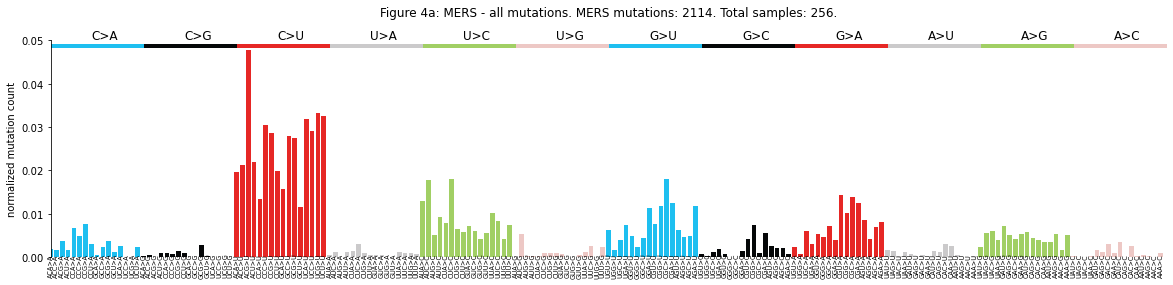

In [29]:
#Figure 4a: MERS - all mutations.
dfmers_unique_muts['FULL_MUT'] = dfmers_unique_muts.apply(get_mut, axis = 1)
dfmers_unique_muts.to_csv("triplet.csv",sep="\t",index=False)
counter_triplets_order = dfmers_unique_muts['FULL_MUT'].value_counts().to_dict()

list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])


plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 4a: MERS - all mutations. MERS mutations: " + str(len(dfmers_unique_muts['FULL_MUT']))+". Total samples: 256.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.002),16,0.001,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/mersAll.png")
plt.show()

/home/mgrau/apps/miniconda3/envs/njupy/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


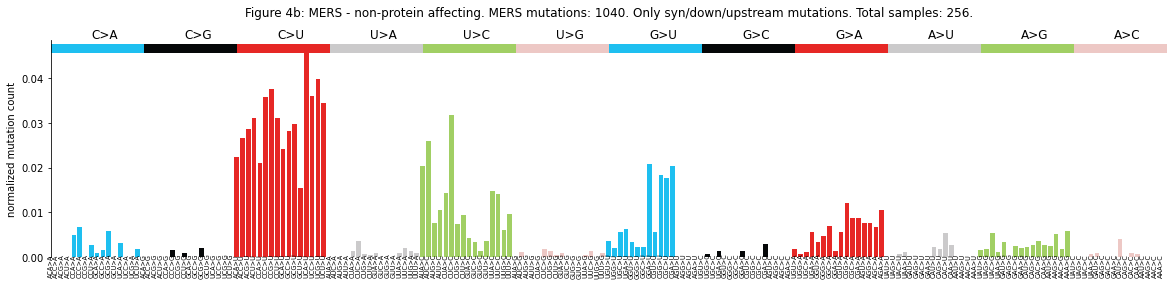

In [30]:
#Figure 4b: MERS - non-protein affecting.
dfmers_syn_unique_muts['FULL_MUT'] = dfmers_syn_unique_muts.apply(get_mut, axis = 1)
counter_triplets_order = dfmers_syn_unique_muts['FULL_MUT'].value_counts().to_dict()
list_order = order_muts_full()
norm_vals = []
ff=0
for ix,mut in enumerate(list_order):
    val = counter_triplets_order.get(mut, 0)
    #Normalization
    count = count_genome_compo[mut[:-2]]
    norm_vals.append(val/count)

dfjson = pd.DataFrame()
dfjson["muta"]=list_order
dfjson["vals"]=np.array(norm_vals)/sum(norm_vals)

ff = sum(np.array(norm_vals)/sum(norm_vals))   
fig, ax = plt.subplots(1, 1, figsize = (20, 4))

colors_mut = ['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
vector = []
colors = []
for ix, c in enumerate(chunks(np.arange(96), 16)):
    colors.extend([colors_mut[ix] for s in c])

plt.bar(np.arange(len(norm_vals)),np.array(norm_vals)/sum(norm_vals), color = colors*2)
plt.ylabel('normalized mutation count')
plt.xticks([])
plt.xlim(0, 192)
plt.title("Figure 4b: MERS - non-protein affecting. MERS mutations: " + str(len(dfmers_syn_unique_muts['FULL_MUT']))+ ". Only syn/down/upstream mutations. Total samples: 256.", y=1.08)
plt.xticks(np.arange(192), [i.replace('T', 'U') for i in list_order], rotation = 90, fontsize = 6)

#header
colors_rectangle =['#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5', '#1ebff0', '#050708', '#e62725', '#cbcacb', '#a1cf64', '#edc8c5']
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks(range(0, len(list_order)))
ax.tick_params(axis='x',  pad=0.9, width=0, length=0)
ax.set_xticklabels(
    [kmer.replace("_", ">").replace("T","U") for kmer in list_order],
    verticalalignment="center", ha='center', rotation=90, fontsize=6.5,
    color='black'
)
j=0
for i,c in enumerate (list_order):
    if (i+1) % 8 == 0 and not (i+1) % 16 == 0:
        ax.annotate(xy=(i,ax.get_ylim()[1]+0.00025),s=str(c[1].replace("T","U")+">"+c[-1].replace("T","U")),color="black",rotation=0, xycoords='data', annotation_clip=False,fontsize=12)
        rect = patches.Rectangle((i-7,ax.get_ylim()[1]-0.003),16,0.002,linewidth=0.0,facecolor=colors_rectangle[j], clip_on=False)
        j+=1
        ax.add_patch(rect)
ax.tick_params(axis='x', which='major', pad=8)
#end header

plt.savefig("data/img/mersSyn.png")
plt.show()